In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time
import requests
import json
from datetime import datetime

In [2]:
def get_btcprice(ticker,max):
    url = ('https://api.coingecko.com/api/v3/coins/')+ticker+('/market_chart?vs_currency=jpy&days=')+max
    r = requests.get(url)
    r2 = json.loads(r.text)
    return r2

In [3]:
# jsonから価格データだけをPandasに変換して抽出する
def get_price(r2):
    s = pd.DataFrame(r2['prices'])
    s.columns = ['date', 'price']
    date = []
    for i in s['date']:
        tsdate = int(i / 1000)
        loc = datetime.utcfromtimestamp(tsdate)
        date.append(loc)
    s.index = date
    del s['date']
    return s

In [4]:
# ビットコインの全期間の価格データを取得する
r2 = get_btcprice('bitcoin', 'max')
btc = get_price(r2)
btc['price'] = btc['price'].astype(int)

In [5]:
btc.index.name = 'ds'
df = btc
df = df.rename(columns={'price':'y'})
df = df.reset_index()
df

,ds,y
0,2013-04-28 00:00:00,13203
1,2013-04-29 00:00:00,14108
2,2013-04-30 00:00:00,13629
3,2013-05-01 00:00:00,11364
4,2013-05-02 00:00:00,10350
...,...,...
3094,2021-10-19 00:00:00,7088251
3095,2021-10-20 00:00:00,7389786
3096,2021-10-21 00:00:00,7573167
3097,2021-10-22 00:00:00,7120615


In [12]:
X = df['ds']
y = df['y']

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,ds,y
2020,2018-11-10,730080
1037,2016-03-02,48113
1943,2018-08-25,743536
1063,2016-03-28,47927
528,2014-10-09,38705
...,...,...
763,2015-06-02,28024
835,2015-08-13,32814
1653,2017-11-08,850216
2607,2020-06-19,1006085


In [24]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test

,ds,y
924,2015-11-10,41508
2892,2021-03-31,6472675
686,2015-03-17,34502
2518,2020-03-22,682174
548,2014-10-29,36190
...,...,...
251,2014-01-05,98567
1328,2016-12-18,92931
357,2014-04-21,50578
1547,2017-07-25,286826


In [25]:
from prophet import Prophet

In [27]:
m = Prophet()
m.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [28]:
m.score(X_train, y_test)

AttributeError: 'Prophet' object has no attribute 'score'

In [ ]:
m.score(X_test, y_test)

In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3455,2022-10-15 02:40:52
3456,2022-10-16 02:40:52
3457,2022-10-17 02:40:52
3458,2022-10-18 02:40:52
3459,2022-10-19 02:40:52


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3455,2022-10-15 02:40:52,1.026105e+07,9.412897e+06,1.110883e+07
3456,2022-10-16 02:40:52,1.027238e+07,9.437309e+06,1.111445e+07
3457,2022-10-17 02:40:52,1.028337e+07,9.362652e+06,1.109760e+07
3458,2022-10-18 02:40:52,1.029122e+07,9.395114e+06,1.113337e+07
3459,2022-10-19 02:40:52,1.030083e+07,9.425369e+06,1.108958e+07


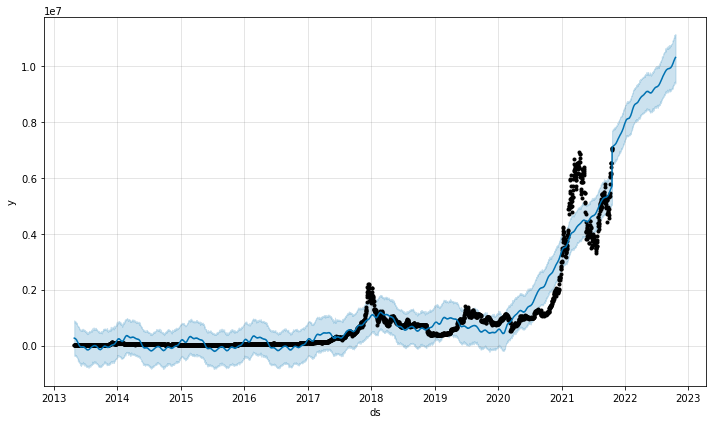

In [17]:
fig1 = m.plot(forecast)

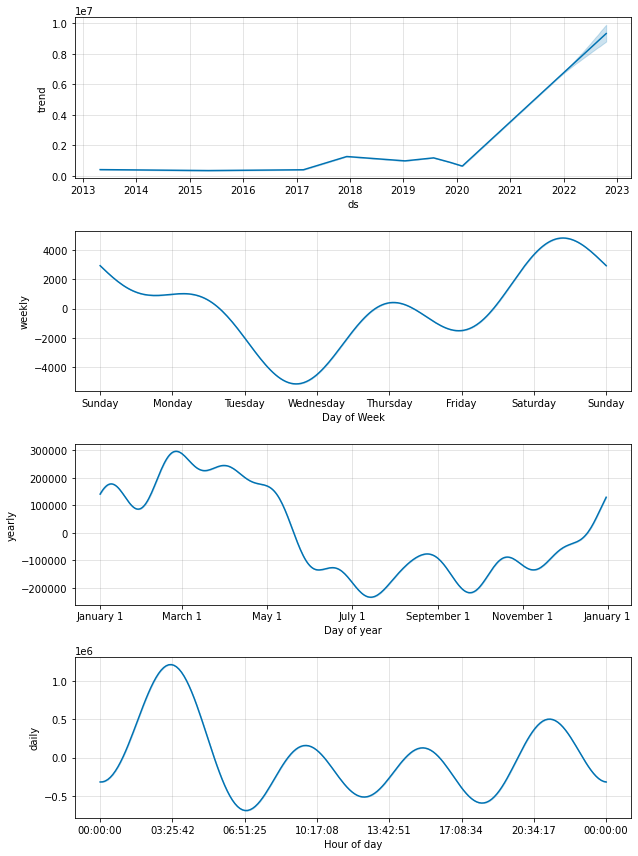

In [11]:
fig2 = m.plot_components(forecast)